In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
data = pd.read_csv('../Water Quality Prediction.csv')
data = data.drop(columns=['Index', 'Lead', 'Zinc', 'Source', 'Time of Day', 'Color', 'Month'])

In [ ]:
data = data.sample(n=10000, random_state=42)
data.dropna(inplace=True)

In [ ]:
# Scatter plot for input variables vs. Potability
for column in data.columns:
    if column != 'Potability':
        plt.scatter(data[column], data['Potability'], alpha=0.5)
        plt.xlabel(column)
        plt.ylabel('Potability')
        plt.title(f'Scatter plot for {column} vs. Potability')
        plt.show()

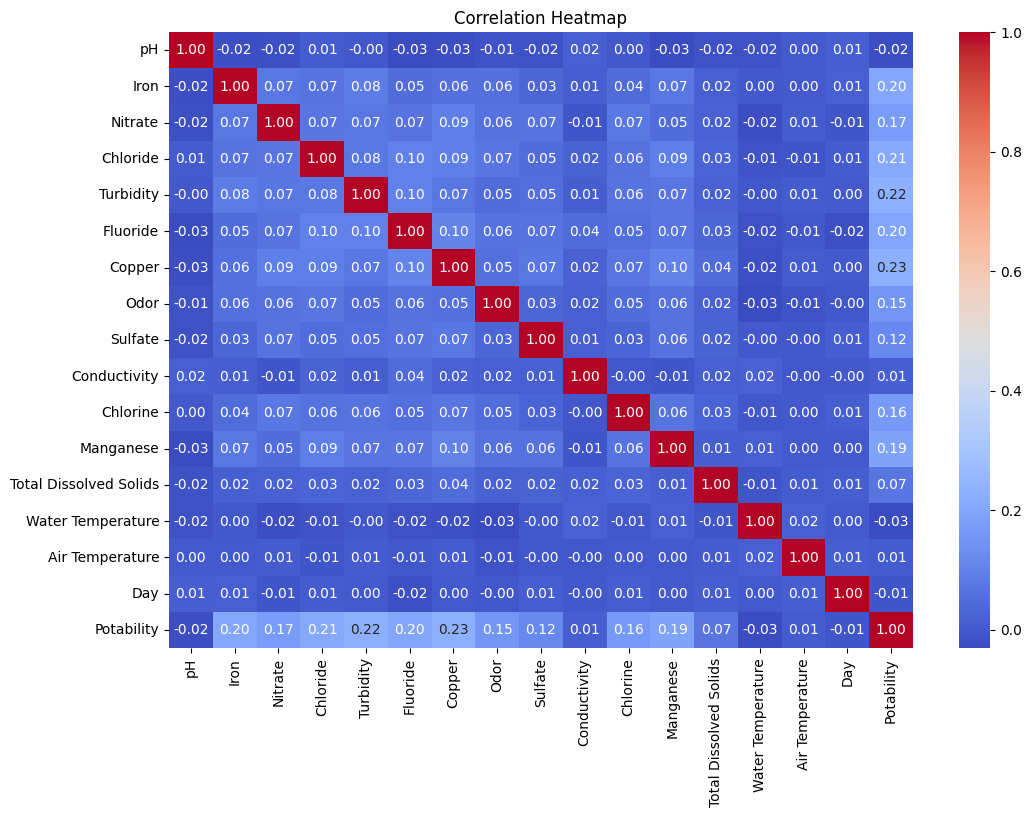

In [18]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

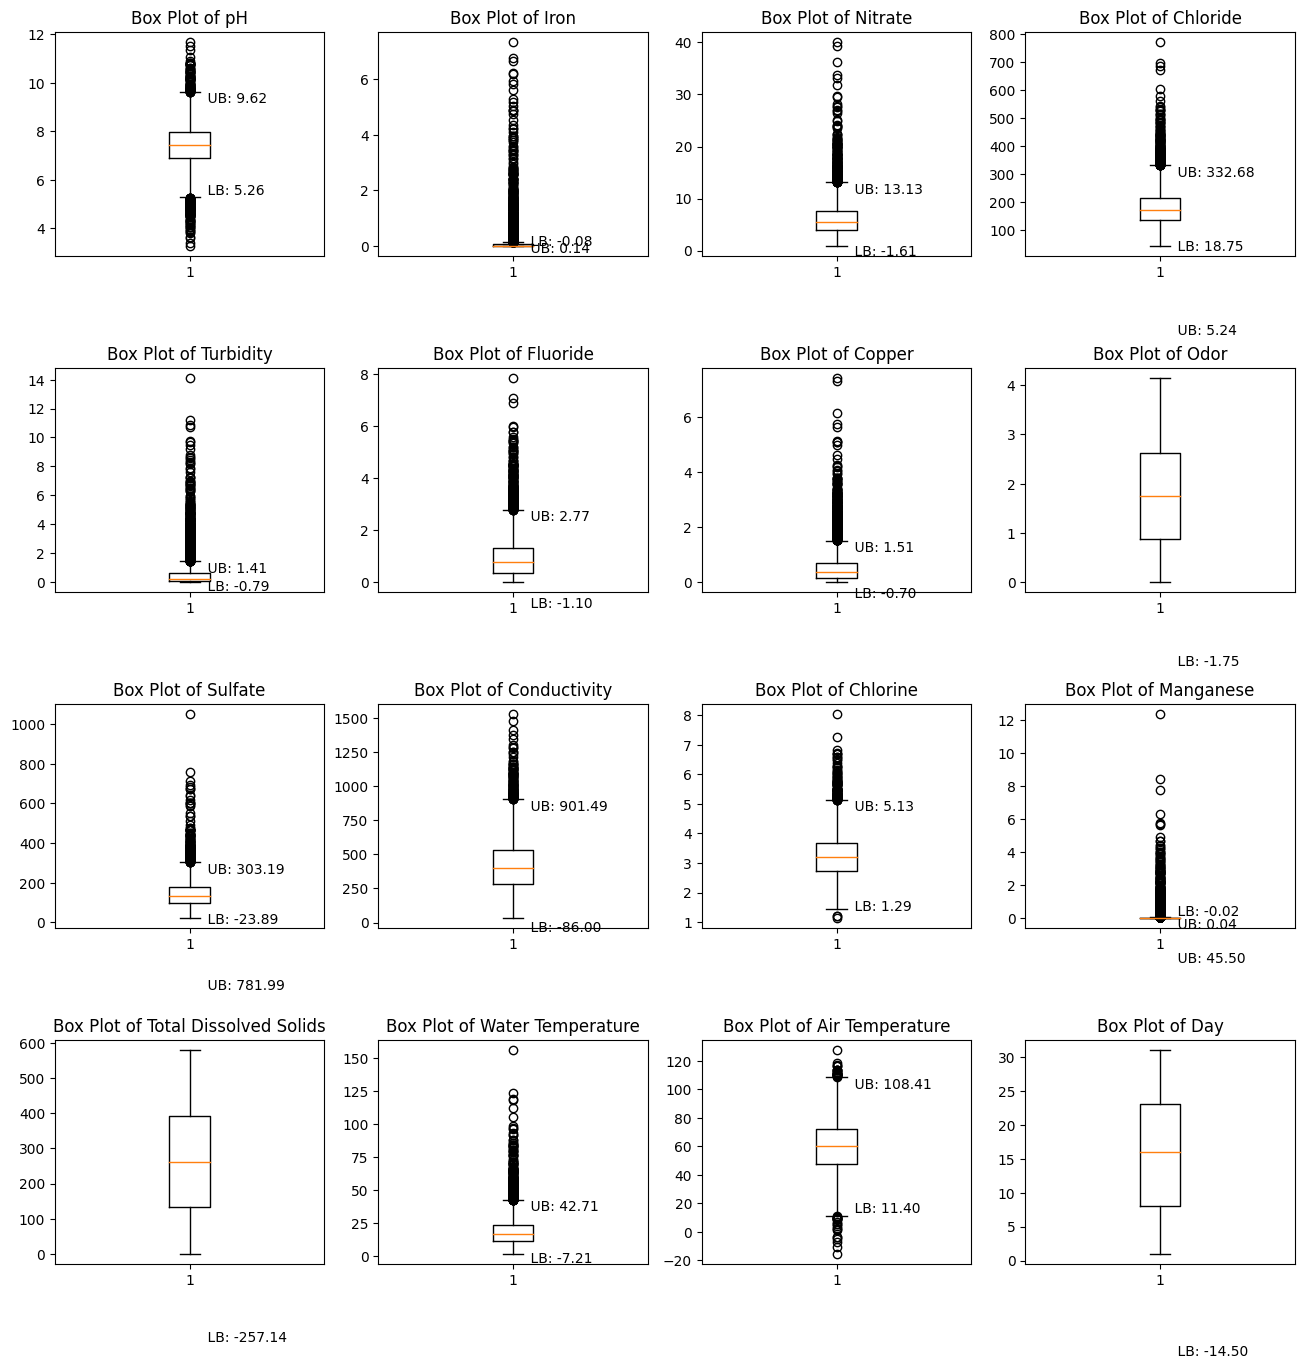

In [16]:
numeric_columns = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Water Temperature', 'Air Temperature', 'Day']

# Create a dictionary to store the lower and upper bounds for each column
outlier_bounds = {}

# Create a single figure for subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

for i, column in enumerate(numeric_columns):
    row = i // 4
    col = i % 4

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_bounds[column] = (lower_bound, upper_bound)

    # Plot the box plot on the current subplot
    axes[row, col].boxplot(data[column])
    axes[row, col].set_title(f'Box Plot of {column}')

    # Annotate the box plot with lower and upper bound values
    lower_bound_str = f'    LB: {lower_bound:.2f}'
    upper_bound_str = f'    UB: {upper_bound:.2f}'
    axes[row, col].text(1, lower_bound, lower_bound_str, verticalalignment='bottom')
    axes[row, col].text(1, upper_bound, upper_bound_str, verticalalignment='top')

# Remove any empty subplots
for i in range(len(numeric_columns), 4 * 4):
    row = i // 4
    col = i % 4
    fig.delaxes(axes[row, col])

# Show the plots
plt.show()

In [17]:
list(outlier_bounds.values())

[(5.259176200499999, 9.621540712500002),
 (-0.084990976875, 0.14169022812499998),
 (-1.6125594391249995, 13.125398829875),
 (18.75344086249997, 332.6845745625),
 (-0.790048501625, 1.411113807375),
 (-1.096926908375, 2.770512804625),
 (-0.6999686091250001, 1.5072475998750001),
 (-1.7521847417499994, 5.244093394249999),
 (-23.88761321874999, 303.18910953125),
 (-85.99990721250003, 901.4900274875),
 (1.292254477500001, 5.129705089499999),
 (-0.021425051999999997, 0.03571273999999999),
 (-257.138827225, 781.987869575),
 (-7.212675822500003, 42.7115750575),
 (11.40309218625, 108.40525241625),
 (-14.5, 45.5)]

In [ ]:
# Calculate the number of rows and columns for the grid
num_columns = len(numeric_columns)
num_rows = math.ceil(num_columns / 2)

# Create a figure and axis objects for the grid
fig, axes = plt.subplots(num_rows, 2, figsize=(16, 4 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Plot histograms for each numeric column in the grid
for i, column in enumerate(numeric_columns):
    axes[i].hist(data[column], bins=20)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for i in range(num_columns, len(axes)):
    fig.delaxes(axes[i])

# Adjust spacing and layout
plt.tight_layout()

# Show the single image
plt.show()

In [ ]:
# Create a single figure and subplot
fig, ax = plt.subplots(figsize=(12, 12))

# Create an empty pairplot to generate the axes and then map it to the axes
g = sns.pairplot(data[numeric_columns], diag_kind="kde")

# Customize the title of the pairplot
g.fig.suptitle("Pairplot of Numeric Columns", y=1.02)

# Show the single image
plt.show()